In [1]:
from glotaran.specification_parser import parse_yml
from glotaran_core.model import Dataset
from glotaran_models.kinetic import KineticSeparableModel
import numpy as np
from lmfit import Parameters
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib notebook

fitspec = '''
type: kinetic

parameter: {}

compartments: [s1, s2, s3]

megacomplexes:
    - label: mc1
      k_matrices: [k1]

k_matrices:
  - label: "k1"
    matrix: {{
      '("s1","s1")': 1,
      '("s2","s2")': 2,
      '("s3","s3")': 3,
}}

initial_concentrations: []

irf:
  - label: irf1
    type: gaussian
    center: 4
    width: 5

datasets: 
  - label: dataset1
    type: spectral
    megacomplexes: [mc1]
    path: none
    irf: irf1

'''

In [2]:
test_parameter = [101e-4, 202e-5, 505e-6, 0.1, 4]
test_amps = [7, 3, 30]
test_x = np.arange(12820, 15120, 4.6)
t0 = np.asarray(np.logspace(-100, 10))
times = np.concatenate([np.arange(-10, 1, 0.1).flatten(),
                        np.arange(-1, 1, 0.01).flatten(),
                       np.arange(10, 50, 1.5).flatten(),
                       np.arange(100, 1500, 15).flatten()])
print(times.shape)


simparams = Parameters()
simparams.add("p1", 101e-4)
simparams.add("p2",202e-4)
simparams.add("p3",405e-4)
simparams.add("p4",0.1)
simparams.add("p5",3.0)
simparams.pretty_print()
print(t0)

(431,)
Name     Value      Min      Max   Stderr     Vary     Expr
p1    0.0101     -inf      inf     None     True     None
p2    0.0202     -inf      inf     None     True     None
p3    0.0405     -inf      inf     None     True     None
p4       0.1     -inf      inf     None     True     None
p5         3     -inf      inf     None     True     None
[  1.00000000e-100   1.75751062e-098   3.08884360e-096   5.42867544e-094
   9.54095476e-092   1.67683294e-089   2.94705170e-087   5.17947468e-085
   9.10298178e-083   1.59985872e-080   2.81176870e-078   4.94171336e-076
   8.68511374e-074   1.52641797e-071   2.68269580e-069   4.71486636e-067
   8.28642773e-065   1.45634848e-062   2.55954792e-060   4.49843267e-058
   7.90604321e-056   1.38949549e-053   2.44205309e-051   4.29193426e-049
   7.54312006e-047   1.32571137e-044   2.32995181e-042   4.09491506e-040
   7.19685673e-038   1.26485522e-035   2.22299648e-033   3.90693994e-031
   6.86648845e-029   1.20679264e-026   2.12095089e-024   3.

In [3]:
model = parse_yml(fitspec.format(test_parameter))
print(model)

Modeltype: Kinetic

Parameter
---------

Index: 1 Initial Value: 0.0101 Label: None
Index: 2 Initial Value: 0.00202 Label: None
Index: 3 Initial Value: 0.000505 Label: None
Index: 4 Initial Value: 0.1 Label: None
Index: 5 Initial Value: 4.0 Label: None

Megacomplexes
-------------

Label: mc1
K-Matrices: ['k1']

Datasets
--------

Dataset 'dataset1'

	Dataset Scaling: None
	Initial Concentration: None
	Megacomplexes: ['mc1']

	Irf: irf1


K-Matrices
----------

Label: k1
Matrix:
[[2 0 0]
 [0 1 0]
 [0 0 3]]


IRFs
----

Label: irf1 Type: 'Gaussian' Center: [4] Width: [5] Center Dispersion: [] Width Dispersion [] Scale: [], Nomalize: True



In [4]:
fitmodel = KineticSeparableModel(model)

/usr/lib64/python3.5/site-packages/pyopencl-2016.2-py3.5-linux-x86_64.egg/pyopencl/cffi_cl.py:1469: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


[  3.80412959e-04   4.29060333e-04   4.83424142e-04   5.44108652e-04
   6.11773532e-04   6.87137938e-04   7.70984784e-04   8.64165209e-04
   9.67603213e-04   1.08230048e-03   1.20934137e-03   1.34989803e-03
   1.50523573e-03   1.67671823e-03   1.86581330e-03   2.07409836e-03
   2.30326613e-03   2.55513033e-03   2.83163141e-03   3.13484226e-03
   3.46697380e-03   3.83038057e-03   4.22756607e-03   4.66118802e-03
   5.13406333e-03   5.64917276e-03   6.20966533e-03   6.81886227e-03
   7.48026056e-03   8.19753592e-03   8.97454530e-03   9.81532863e-03
   1.07241100e-02   1.17052981e-02   1.27634855e-02   1.39034475e-02
   1.51301400e-02   1.64486958e-02   1.78644206e-02   1.93827871e-02
   2.10094288e-02   2.27501319e-02   2.46108261e-02   2.65975740e-02
   2.87165598e-02   3.09740757e-02   3.33765076e-02   3.59303191e-02
   3.86420345e-02   4.15182197e-02   4.45654628e-02   4.77903523e-02
   5.11994549e-02   5.47992917e-02   5.85963130e-02   6.25968728e-02
   6.68072013e-02   7.12333774e-02

<IPython.core.display.Javascript object>


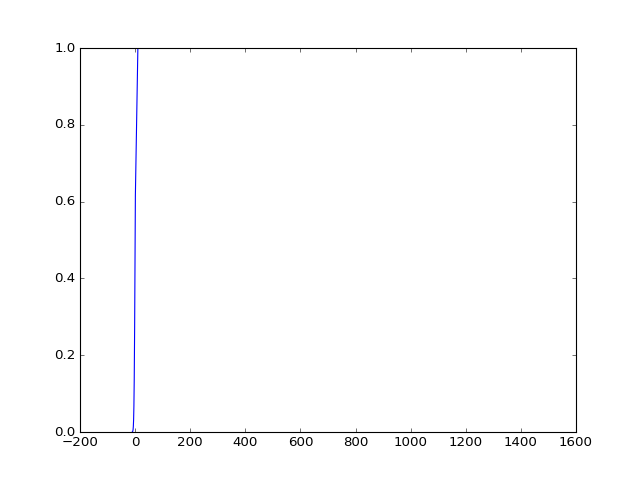

In [5]:
c = fitmodel.c_matrix(simparams, *times, **{'dataset':'dataset1', 
                                           'noise':False, 'noise_std_dev':0.01,
                                           'dataset1_x': test_x,
                                           'amplitudes':[1, 1, 1],
                                          'locations':[14700, 13515, 14180],
                                           'delta': [400,100,300]
                                           })

print(c[250,:, 1])
fig = plt.figure()
#plt.plot(times, c[250,:, 0])
plt.plot(times, c[250,:, 1])
#plt.plot(times, c[250,:, 2])

(431, 501)
em
(501, 3)
[1, 0, 2]
(501, 3)


<IPython.core.display.Javascript object>


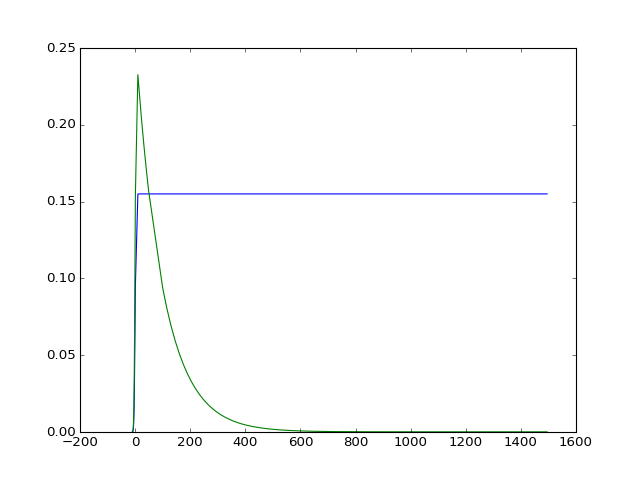

<IPython.core.display.Javascript object>


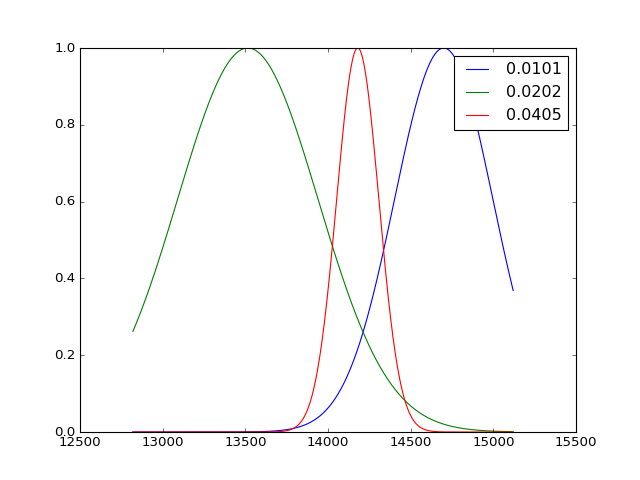

In [6]:
data = fitmodel.eval(simparams, *times, **{'dataset':'dataset1', 
                                           'noise':False, 'noise_std_dev':0.01,
                                           'dataset1_x': test_x,
                                           'amplitudes':[1, 1, 1],
                                          'locations':[14700, 13515, 14180],
                                           'delta': [400,100,300]
                                           })
# DAS
DAS = fitmodel.coefficients(**{'dataset':'dataset1','dataset1_x': test_x,
                                           'amplitudes':[1, 1, 1],
                                          'locations':[14700, 13515, 14180],
                                           'delta': [700,1000,300]
                                           })
print(DAS.shape)
fig = plt.figure()
plt.plot(times, data[:, 480])
plt.plot(times, data[:, 250])

fig = plt.figure()
d1, = plt.plot(test_x, DAS[:, 0], label=simparams['p1'].value)
d2, = plt.plot(test_x, DAS[:, 1], label=simparams['p2'].value)
d3, = plt.plot(test_x, DAS[:, 2], label=simparams['p3'].value)
plt.legend(handles=[d1, d2, d3])

<IPython.core.display.Javascript object>


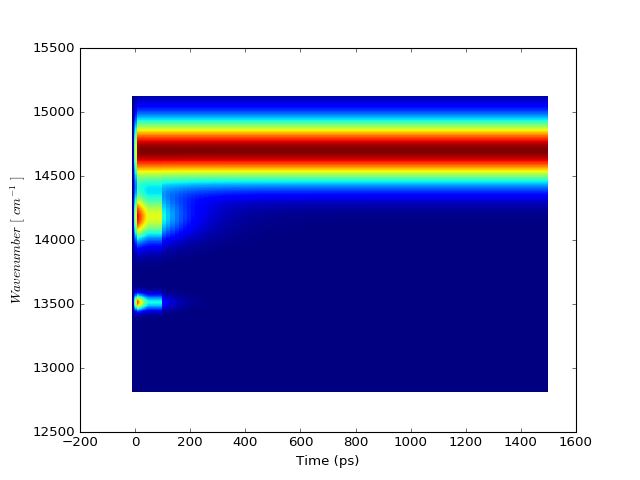

In [7]:
# Plot full trace

fig = plt.figure()
plt.xlabel('Time (ps)')
plt.ylabel('$Wavenumber\ [\ cm^{-1}\ ]$')
plt.pcolormesh(times, test_x, data.T)
plt.show()

In [8]:
%time{fitmodel.fit(fitmodel.get_initial_fitting_parameter(), *times, **{"dataset1": data})}
result = fitmodel.fit(fitmodel.get_initial_fitting_parameter(), *times, **{"dataset1": data})
result.best_fit_parameter.pretty_print()
reconstructed_data = result.eval(*times, **{"dataset1": data})

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.1384e+01                                    8.75e+02    
       1              3         1.7699e+00      1.96e+01       1.00e+00       4.03e+02    
       2              6         9.2924e-01      8.41e-01       1.25e-01       1.85e+02    
       3              7         2.6181e-01      6.67e-01       3.13e-02       2.02e+02    
       4              8         2.5347e-03      2.59e-01       6.25e-02       1.38e+01    
       5             11         1.0219e-04      2.43e-03       7.81e-03       1.09e-01    
       6             13         3.5503e-06      9.86e-05       3.91e-03       1.03e-02    
       7             16         1.4806e-07      3.40e-06       4.88e-04       1.82e-03    
       8             18         1.3008e-07      1.80e-08       2.44e-04       1.71e-03    
       9             20         1.4544e-10      1.30e-07       1.22e-04       5.70e-05    

<IPython.core.display.Javascript object>


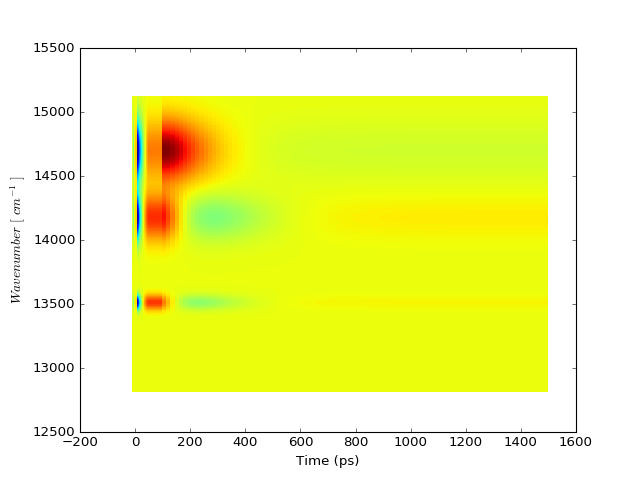

(431,)


<IPython.core.display.Javascript object>


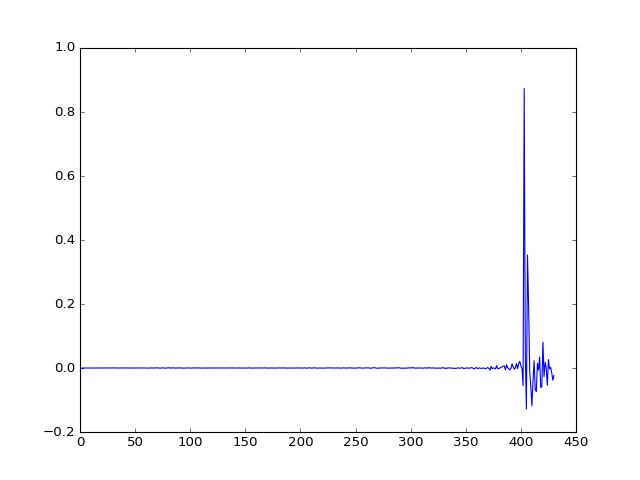

<IPython.core.display.Javascript object>


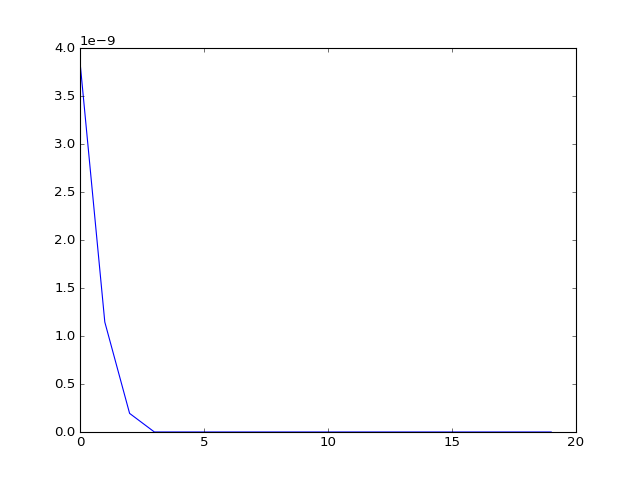

<IPython.core.display.Javascript object>


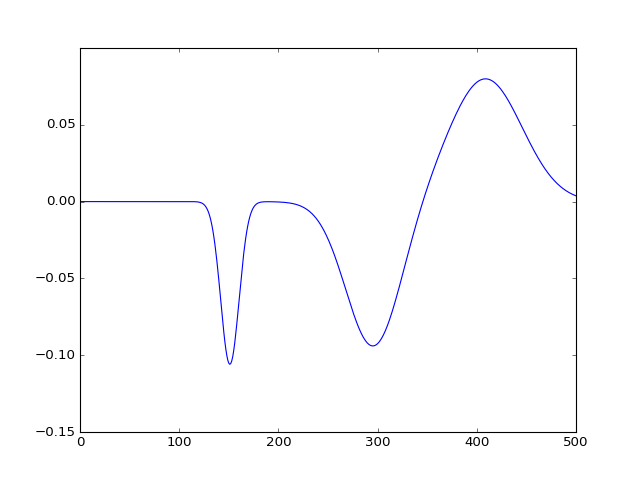

In [9]:
# Plot residuals

fig = plt.figure()
plt.xlabel('Time (ps)')
plt.ylabel('$Wavenumber\ [\ cm^{-1}\ ]$')
plt.pcolormesh(times, test_x, result.final_residual(*times, **{"dataset1": data}).T)
plt.show()

lsv, svals, rsv = result.final_residual_svd(*times, **{"dataset1": data})
print(svals.shape)

fig = plt.figure()
plt.plot(lsv[1, :], label="lsv")

fig = plt.figure()
plt.plot(svals[:20], label="sval")

fig = plt.figure()
plt.plot(rsv[1, :], label="rsv")

(3, 501)


<IPython.core.display.Javascript object>


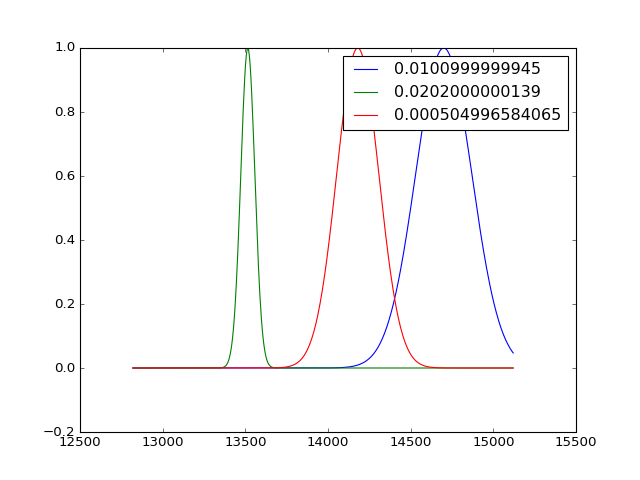

In [10]:
# DAS
DAS = result.spectra(*times, **{'dataset':'dataset1', "dataset1": data})
print(DAS.shape)
fig = plt.figure()
d1, = plt.plot(test_x, DAS[0, :], label=result.best_fit_parameter['p1'].value)
d2, = plt.plot(test_x, DAS[1, :], label=result.best_fit_parameter['p2'].value)
d3, = plt.plot(test_x, DAS[2, :], label=result.best_fit_parameter['p3'].value)
plt.legend(handles=[d1, d2, d3])

(3, 501)


<IPython.core.display.Javascript object>


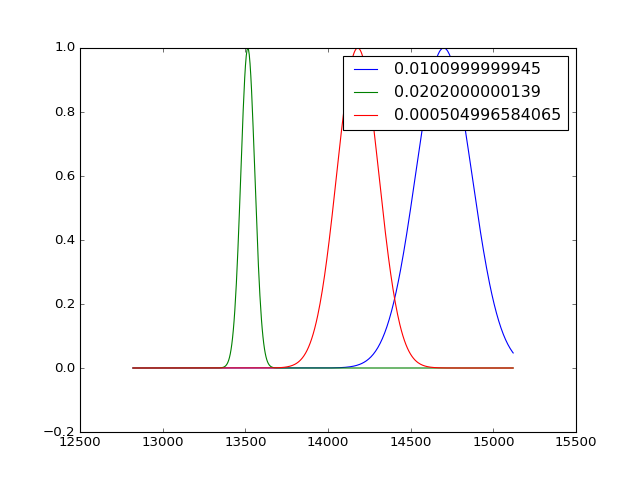

In [11]:
# normalized DAS
nDAS = result.normalized_spectra(*times, **{'dataset':'dataset1', "dataset1": data})
print(DAS.shape)
fig = plt.figure()
d1, = plt.plot(test_x, nDAS[0, :], label=result.best_fit_parameter['p1'].value)
d2, = plt.plot(test_x, nDAS[1, :], label=result.best_fit_parameter['p2'].value)
d3, = plt.plot(test_x, nDAS[2, :], label=result.best_fit_parameter['p3'].value)
plt.legend(handles=[d1, d2, d3])

(431,)


<IPython.core.display.Javascript object>


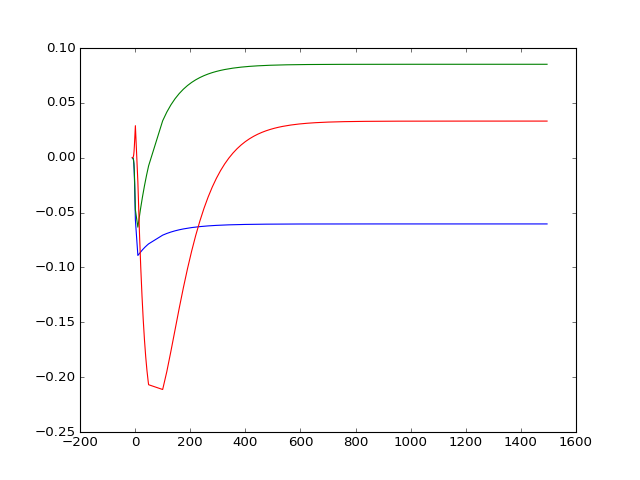

<IPython.core.display.Javascript object>


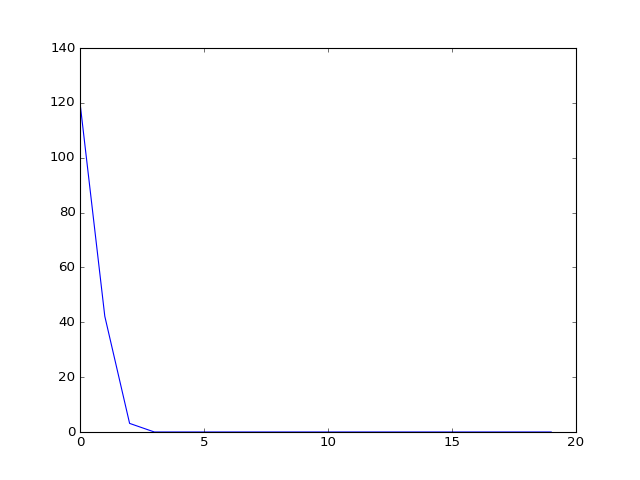

<IPython.core.display.Javascript object>


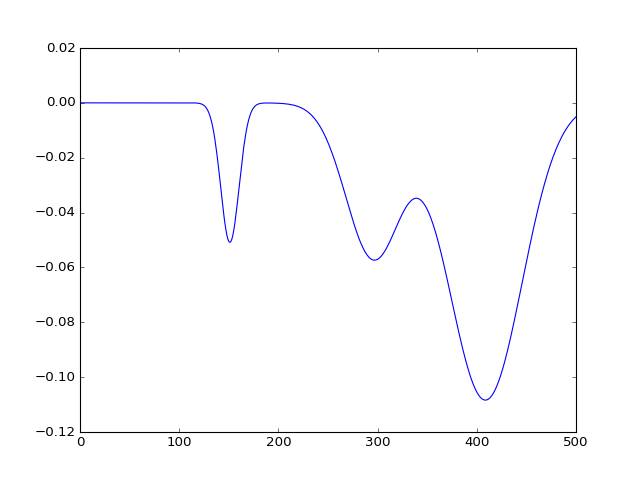

In [12]:
lsv, svals, rsv = result.svd(*times, **{"dataset1": data})
print(svals.shape)

fig = plt.figure()
plt.plot(times, lsv[:, :3], label="lsv")

fig = plt.figure()
plt.plot(svals[:20], label="sval")

fig = plt.figure()
plt.plot(rsv[0, :], label="rsv")

(501, 431, 3)


<IPython.core.display.Javascript object>


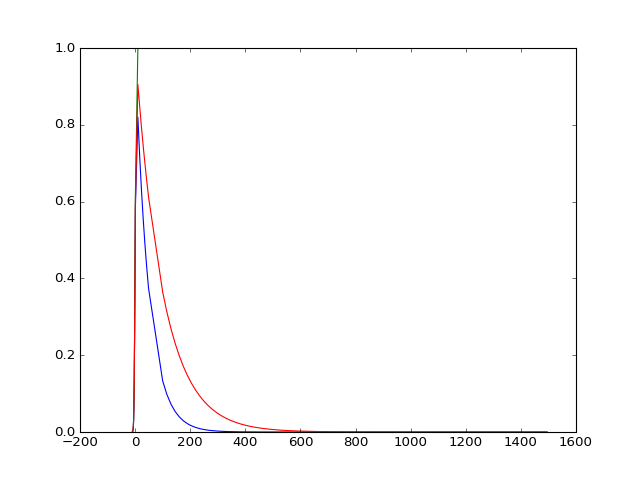

In [13]:
c_matrix = result.c_matrix(*times, **{"dataset1": data})
print(c_matrix.shape)

fig = plt.figure()
plt.plot(times, c_matrix[0, :, :], label="lsv")